# Module 5: Assignment 3 
## Image Forensics

![](https://cdn.vox-cdn.com/thumbor/eZBqDFkoM-tqX_GBqfxmuPR4_c4=/0x0:1826x1069/1820x1213/filters:focal(767x389:1059x681):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/64005344/adobe_manipulated_faces.0.jpg)

numPy, skimage, scipy, and openCV provide a wealth of tools to manipulate, interrogate, and investigate photo images. Devise a program for foresenic analysis of images that is capable of analysing if a photo has been photoshopped.

Even Adobe is working on this problem: 
* [Adobe’s new AI tool automatically spots Photoshopped faces - The Verge](https://www.theverge.com/2019/6/14/18678782/adobe-machine-learning-ai-tool-spot-fake-facial-edits-liquify-manipulations)
* [New Adobe tool can detect if a face has been photoshopped](https://thenextweb.com/news/adobe-experiment-can-detect-if-a-face-has-been-photoshopped)

Given two photos, you should consider the criteria discuss in class and the tools available to devise an approach to detect image manipulation. Use at least one additional approach beyond what was discussed in class. You do not need to implement any additional algorithms, you may use functions from any available image processing packages. Please write out all your assumptions for your approach.

Your program should take two photos as input and determine if one of them has been photoshopped. You may provide a metric or a simple, "Yes" or "No", but any thresholds you use to make this evaluation should be clearly explained. 

If you detect image manipulation, highlight the area that has been changed (see module-5-blurring.ipynb). Use the sample photos provided in the `data.zip` file. Some pairs of images have one photoshopped, some do not. There are 7 pairs labelled `set-[1-7]-[ab].jpg`. Please list if you believe the sets are photoshopped or identical pictures.


Your program should be designed to work within a juypter notebook so that the images can be visualized.








# Approach
----------
To detect whether or not an image was manipulated, this program will take two images and check for differences in the following properties:
- Edge descrepancies
- Noise distribution
- Blurriness
- Colour/brightness differences


**Edge Detection Comparison:** Difference in edges between the two images may highlight any unusual boundaries indicating manipulation.
- Canny edge detector from skimage.feature to find edges in both images.

**Noise Analysis:** Highlight regions with unusual noise discrepancies between the images.
- Extract regions of interest and calculate noise levels by analyzing variance in pixel intensities.

**Blur Detection:** Compute the variance of the Laplacian for both images in selected regions to detect blur differences.
- Apply a Laplacian filter to assess the blurriness.

**Color Histogram Comparison:** Significant differences in color distribution could indicate potential manipulation.
- Use OpenCV’s cv2.compareHist to calculate the histogram difference between the two images.



Check metrics against thresholds and flag the pairs with high differences as altered.


SET 1:
High difference in image noise:  22.144308083168198
SET 2:
SET 3:
SET 4:
High difference at edges (Canny Edge Detector):  0.24744797


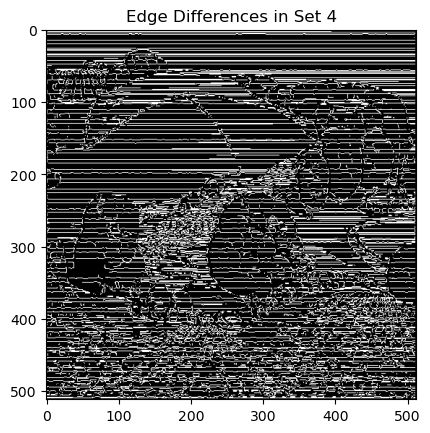

High difference in image noise:  12159.965201622103
High difference in blurring:  13078.371510083076
SET 5:
SET 6:
High difference in image noise:  0.8031005859373863
SET 7:
High difference in image noise:  1.0330759684243276


In [29]:
import cv2 #! pip3 install opencv-python
import numpy as np
from skimage import io, feature
from matplotlib import pyplot as plt
from scipy import ndimage

# Load image pair
def load_and_resize_image(path, size=(512, 512)):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    sized_image = cv2.resize(image, size) # ensure sizes are consistent
    return sized_image

# Check edges 
def edge_detection(img1, img2):
    edges1 = feature.canny(cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY), sigma=1.0)
    edges2 = feature.canny(cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY), sigma=1.0)
    diff = np.abs(edges1.astype(np.float32) - edges2.astype(np.float32))
    return diff

#  Check image noise
def noise_analysis(img1, img2):
    noise_diff = np.abs(cv2.Laplacian(img1, cv2.CV_64F).var() - cv2.Laplacian(img2, cv2.CV_64F).var())
    return noise_diff

# Check bluriness
def blur_analysis(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

# Compare colour histograms
def c_histogram_diff(img1, img2):
    hist1 = cv2.calcHist([img1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist2 = cv2.calcHist([img2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

# Analyze the images
for i in range(7):
    path_a = f'./data/set-{i+1}-a.jpg'
    path_b = f'./data/set-{i+1}-b.jpg'

    img1 = load_and_resize_image(path_a)
    img2 = load_and_resize_image(path_b)

    # All checks for the image pair
    edge_diff = edge_detection(img1, img2)
    noise_diff = noise_analysis(img1, img2)
    blur_diff = abs(blur_analysis(img1) - blur_analysis(img2))
    hist_diff = c_histogram_diff(img1, img2)
    ela_diff = error_level_analysis(img1)

    thresholds = {"edge": 0.2, "noise": 0.3, "blur": 50, "hist": 0.9}
    
    # Decision based on thresholds
    print(f"SET {i+1}:")
    if edge_diff.mean() > thresholds["edge"]:
        print("High difference at edges (Canny Edge Detector): ", edge_diff.mean())
        plt.imshow(edge_diff, cmap='gray')
        plt.title(f"Edge Differences in Set {i+1}")
        plt.show()
    if noise_diff > thresholds["noise"]:
        print("High difference in image noise: ", noise_diff)
    if blur_diff > thresholds["blur"]:
        print("High difference in blurring: ", blur_diff)
    if hist_diff < thresholds["hist"]:
        print("High difference in colour histograms.")
        plt.imshow(hist_diff, cmap='gray')
        plt.title(f"Histogram Differences in Set {i+1}")
        plt.show()
    

Results
-------

| Image Set | Photoshopped | Highlighted Changes |
| -- |  -- | --|
| Set 1  | yes | Difference in img noise | 
| Set 2  |  no | - | 
| Set 3  |  no | - | 
| Set 4  |  yes | Difference in edges, noise, and blurring | 
| Set 5  |  no | - | 
| Set 6  |  yes | Difference in img noise | 
| Set 7  |  yes | Difference in img noise | 

### References:
- Some reused from part 1.
- Edge detection (Canny): https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
- Image Noise: https://unimatrixz.com/topics/story-telling/analyzing-image-noise-using-opencv-and-python/
- Laplacial and blur detection: https://medium.com/@sagardhungel/laplacian-and-its-use-in-blur-detection-fbac689f0f88